In [1]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt

1. Write a function `my_lin_interp(x, y, X)` where x and y are arrays that contain experimental data points, and X is an array.                                                                                                                       
Assume that x and X are in ascending order and have unique elements.                                                          
The output argument, Y, should be an array the same size as X, where Y[i] is the linear interpolation of X[i].                     
Do not use interp from NumPy or interp1d from SciPy

In [2]:
def my_lin_interp(x, y, X):
    """Perform linear interpolation."""
    n = len(x)  # Number of data points
    m = len(X)  # Number of points to interpolate
    Y = [0.0] * m  # Array to store interpolated values

    # Perform linear interpolation
    j = 0
    for i in range(m):
        while j < n - 1 and X[i] > x[j + 1]:
            j += 1

        # Perform linear interpolation between (x[j], y[j]) and (x[j + 1], y[j + 1])
        Y[i] = y[j] + (y[j + 1] - y[j]) * (X[i] - x[j]) / (x[j + 1] - x[j])

    return Y

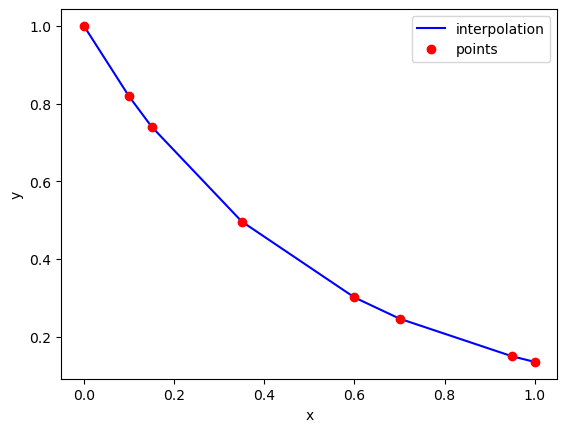

In [3]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)
Y = my_lin_interp(x, y, X)

plt.plot(X, Y,"b",x, y, "ro")
plt.legend(['interpolation','points'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

2. Write a function `my_cubic_spline(x, y, X)` where x and y are arrays that contain experimental data points, and X is an array.                                                                                                                       
Assume that x and X are in ascending order and have unique elements.                                                           
The output argument, Y, should be an array the same size as X, where Y[i] is cubic spline interpolation of X[i].            
Do not use interp1d or CubicSpline.

In [4]:
def my_cubic_spline(x, y, X):

    n = len(x)  # Number of data points
    m = len(X)  # Number of points to interpolate

    # Calculate the second derivatives of the cubic spline
    h = [x[i + 1] - x[i] for i in range(n - 1)]
    delta = [(y[i + 1] - y[i]) / h[i] for i in range(n - 1)]
    l = [1] + [0] * (n - 2) + [1]
    mu = [0] * (n - 1)
    z = [0] * n

    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        delta[i] = (delta[i] - h[i - 1] * delta[i - 1]) / l[i]

    for i in range(n - 3, -1, -1):
        delta[i] = delta[i] - mu[i] * delta[i + 1]

    # Perform cubic spline interpolation
    Y = [0.0] * m  # Array to store interpolated values
    j = 0
    for i in range(m):
        while j < n - 1 and X[i] > x[j + 1]:
            j += 1
        h_j = x[j + 1] - x[j]
        t = (X[i] - x[j]) / h_j
        Y[i] = (2 * t**3 - 3 * t**2 + 1) * y[j] + (t**3 - 2 * t**2 + t) * h_j * delta[j]
        Y[i] += (-2 * t**3 + 3 * t**2) * y[j + 1] + (t**3 - t**2) * h_j * delta[j]

    return Y

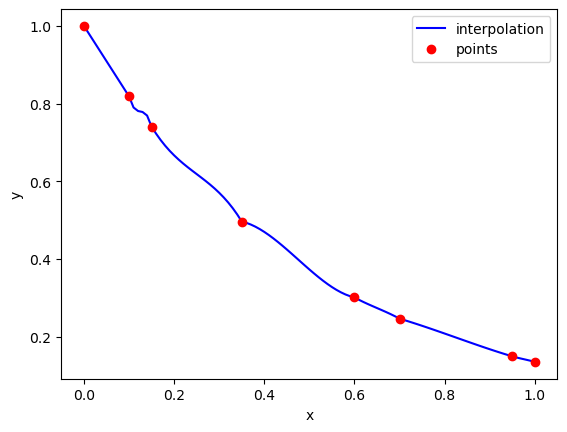

In [5]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)
Y = my_cubic_spline(x, y, X)

plt.plot(X, Y,"b",x, y, "ro")
plt.legend(['interpolation','points'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

3. Write a function `my_nearest_neighbor(x, y, X)` where x and y are arrays that contain experimental data points, and X is an array.                                                                                                                  
Assume that x and X are in ascending order and have unique elements.                                                     
The output argument, Y, should be an array the same size as X, where Y[i] is the nearest neighbor interpolation of X[i].      
That is, Y[i] should be the y[j] where x[j] is the closest independent data point of X[i]. Do not use interp1d from SciPy.

In [6]:
def my_nearest_neighbor(x, y, X):

    Y = np.zeros_like(X)  # Array to store interpolated values

    # Perform nearest neighbor interpolation
    for i, xi in enumerate(X):
        idx = np.abs(x - xi).argmin()  # Find the index of the nearest neighbor
        Y[i] = y[idx]  # Assign the corresponding y value

    return Y

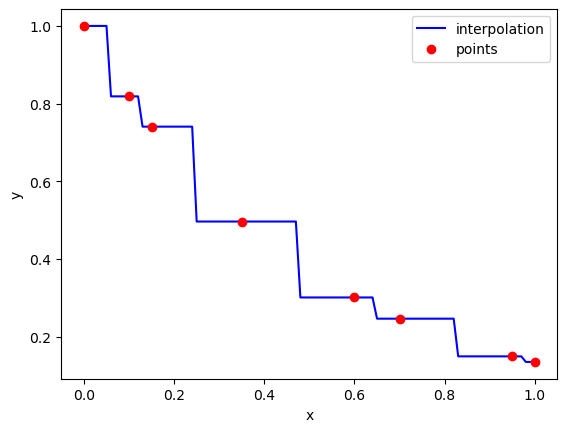

In [7]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)
Y = my_nearest_neighbor(x, y, X)

plt.plot(X, Y,"b",x, y, "ro")
plt.legend(['interpolation','points'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. Think of a circumstance where using the nearest neighbor interpolation would be superior to cubic spline interpolation.

* Discontinuous Data: If the data being interpolated has abrupt changes or discontinuities, such as step functions or sharp edges, nearest neighbor interpolation can preserve these discontinuities better than cubic spline interpolation. Nearest neighbor interpolation assigns the value of the nearest data point, which results in a "staircase" effect that can accurately represent the sharp transitions.

* Outliers: If the data contains outliers or noise that can significantly affect the interpolation, nearest neighbor interpolation can be more robust. Nearest neighbor interpolation is less influenced by outliers since it directly uses the nearest data point without considering the values of neighboring points.

* Irregular Sampling: In cases where the data points are irregularly spaced or have varying densities, nearest neighbor interpolation can provide more accurate results. Nearest neighbor interpolation does not assume any smoothness between data points, making it suitable when there is no underlying pattern or regularity in the data distribution.

* Fast Interpolation: Nearest neighbor interpolation is computationally efficient compared to cubic spline interpolation. If the main concern is speed and the interpolation accuracy is not critical, nearest neighbor interpolation can be a favorable choice.

5. Write a function `my_cubic_spline_flat(x, y, X)` where x and y are arrays that contain experimental data points, and X is an array.                                                                                                                    
Assume that x and X are in ascending order and have unique elements.                                                        
The output argument, Y, should be an array the same size as X, where Y[i] is the cubic spline interpolation of X[i].      
Instead of the constraints introduced previously, use $S'_1(x_1) = 0$ and $S'_{n−1}(x_n) = 0.$

In [8]:
def my_cubic_spline_flat(x, y, X):
    n = len(x)  # Number of data points
    m = len(X)  # Number of points to interpolate

    # Calculate the second derivatives of the cubic spline
    h = [x[i + 1] - x[i] for i in range(n - 1)]
    delta = [(y[i + 1] - y[i]) / h[i] for i in range(n - 1)]

    # Apply additional constraints
    delta.insert(0, 0)
    delta.append(0)

    l = [1] + [0] * (n - 2) + [1]
    mu = [0] * (n - 1)
    z = [0] * n

    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        delta[i] = (delta[i] - h[i - 1] * delta[i - 1]) / l[i]

    for i in range(n - 3, -1, -1):
        delta[i] = delta[i] - mu[i] * delta[i + 1]

    # Perform cubic spline interpolation
    Y = [0.0] * m  # Array to store interpolated values
    j = 0
    for i in range(m):
        while j < n - 1 and X[i] > x[j + 1]:
            j += 1
        h_j = x[j + 1] - x[j]
        t = (X[i] - x[j]) / h_j
        Y[i] = (2 * t**3 - 3 * t**2 + 1) * y[j] + (t**3 - 2 * t**2 + t) * h_j * delta[j]
        Y[i] += (-2 * t**3 + 3 * t**2) * y[j + 1] + (t**3 - t**2) * h_j * delta[j + 1]

    # Smooth the ends for a better plot
    Y[0] = y[0] + (X[0] - x[0]) * (y[1] - y[0]) / (x[1] - x[0])
    Y[-1] = y[-1] + (X[-1] - x[-1]) * (y[-1] - y[-2]) / (x[-1] - x[-2])

    return Y

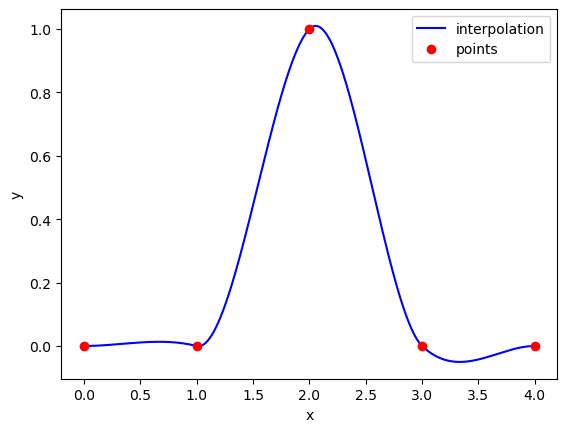

In [9]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 1001)
Y = my_cubic_spline_flat(x, y, X)

plt.plot(X, Y,"b",x, y, "ro")
plt.legend(['interpolation','points'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

6. Write a function `my_quintic_spline(x, y, X)` where x and y are arrays that contain experimental data points, and X is an array.                                                                                                                  
Assume that x and X are in ascending order and have unique elements.                                                             
The output argument, Y, should be an array the same size as X, where Y[i] is the quintic spline interpolation of X[i].       
You will need to use additional endpoint constraints to come up with enough constraints.                                      
You may use endpoint constraints at your discretion.

In [10]:
def my_quintic_spline(x, y, X):    
    if len(x) != len(y):         # Check if x and y have the same length
        raise ValueError("x and y must have the same length.")

    cs = si.CubicSpline(x, y) # Construct a cubic spline interpolant

    # Calculate the derivatives at the endpoints for quintic spline interpolation
    n = len(x)
    h0 = x[1] - x[0]
    hn = x[-1] - x[-2]
    m0 = (y[1] - y[0]) / h0
    mn = (y[-1] - y[-2]) / hn
    cs.c[0] = cs.c[0] - (1/3) * h0 * m0
    cs.c[-1] = cs.c[-1] - (1/3) * hn * mn
    Y = cs(X)   # Evaluate the quintic spline interpolant at the points X
    return Y

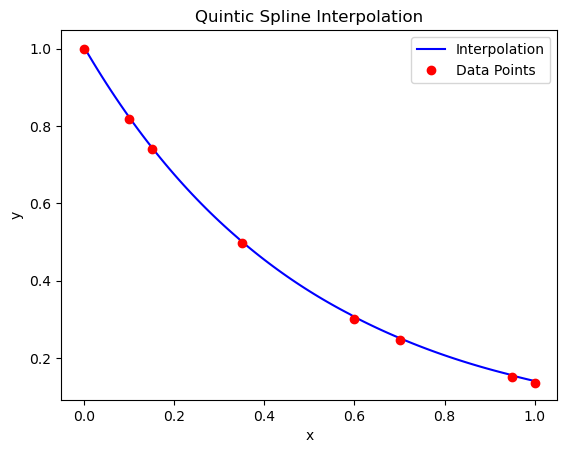

In [11]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)
Y = my_quintic_spline(x, y, X)
plt.plot(X, Y, 'b', x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quintic Spline Interpolation')
plt.legend(['Interpolation', 'Data Points'])
plt.show()

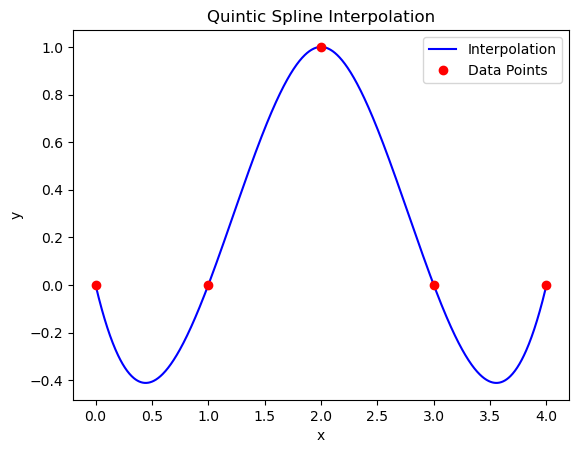

In [12]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 1001)
Y = my_quintic_spline(x, y, X)
plt.plot(X, Y, 'b', x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quintic Spline Interpolation')
plt.legend(['Interpolation', 'Data Points'])
plt.show()

7. Write a function `my_interp_plotter(x, y, X, option)` where x and y are arrays containing experimental data points, and X is an array that contains the coordinates for which an interpolation is desired.                                        
The input argument option should be a string, either **“linear,” “spline,” or “nearest.”**                                                                          
Your function should produce a plot of the data points (x, y) marked as red circles.                                       
The points (X, Y ), where X is the input and Y is the interpolation at the points contained in X defined by the input argument specified by option.                                                                                             
The points (X, Y ) should be connected by a blue line. Be sure to include the title, axis labels, and a legend.              
Hint: You should use interp1d from SciPy, and checkout the kind option.

In [13]:
def my_interp_plotter(x, y, X, option):

    plt.figure(figsize = (10,8))
    if option=="linear":
        f = si.interp1d(x, y)
        Y = f(X)
        plt.plot(X, Y,"b",x, y, "ro")
        plt.title("Linear Interpolation")
    elif option=="spline":
        f = si.interp1d(x, y, kind='cubic')
        Y = f(X)
        plt.plot(X, Y, "b",x, y, "ro")
        plt.title("Cubic Spline Interpolation")
    elif option=="nearest":
        f = si.interp1d(x, y, kind='nearest')
        Y = f(X)
        plt.plot(X, Y, "b",x, y, "ro")
        plt.title("Nearest Interpolation")
    else:   
        print("system disorder")
        
    plt.legend(['interpolation','points'])    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    return None

In [14]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
X = np.linspace(0, 1, 101)

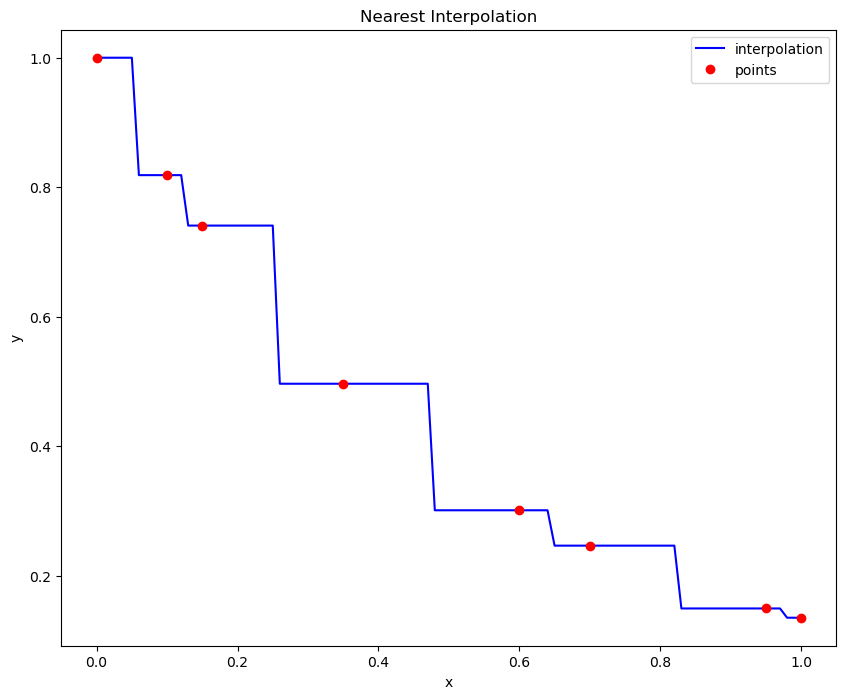

In [15]:
my_interp_plotter(x, y, X, "nearest")

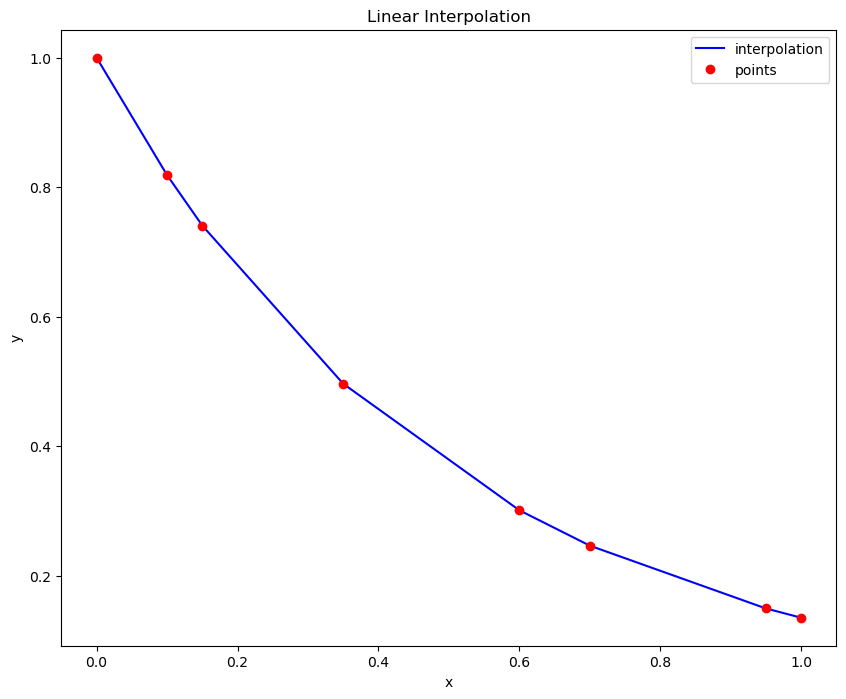

In [16]:
my_interp_plotter(x, y, X, "linear" )        

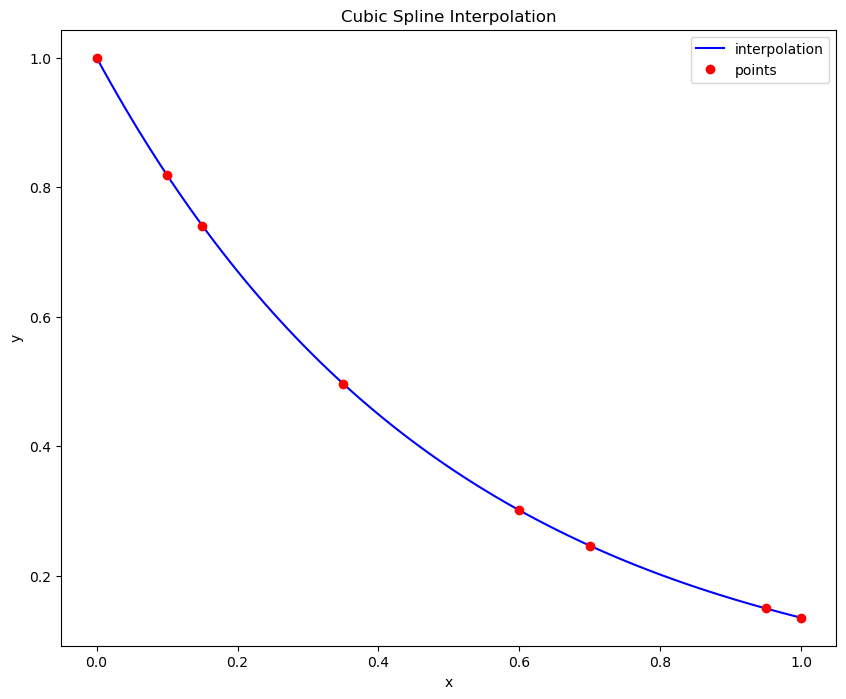

In [17]:
my_interp_plotter(x, y, X, "spline" )

8. Write a function `my_D_cubic_spline(x, y, X, D)`, where the output Y is the **cubic spline interpolation** at X taken from the data points contained in x and y. Instead of the standard pinned endpoint conditions (i.e., ${S"}_1 (x_1) = 0$ and ${S"}_{n−1}(x_n) = 0$), use the endpoint conditions $S'_1(x_1) = D$ and $S'_{n−1}(x_n) = D$ (i.e., the slopes of the interpolating polynomials at the endpoints are $D$).

In [18]:
def my_D_cubic_spline(x, y, X, D):
    f = si.CubicSpline(x, y, bc_type=((1, D), (1, D)))
    return f(X)

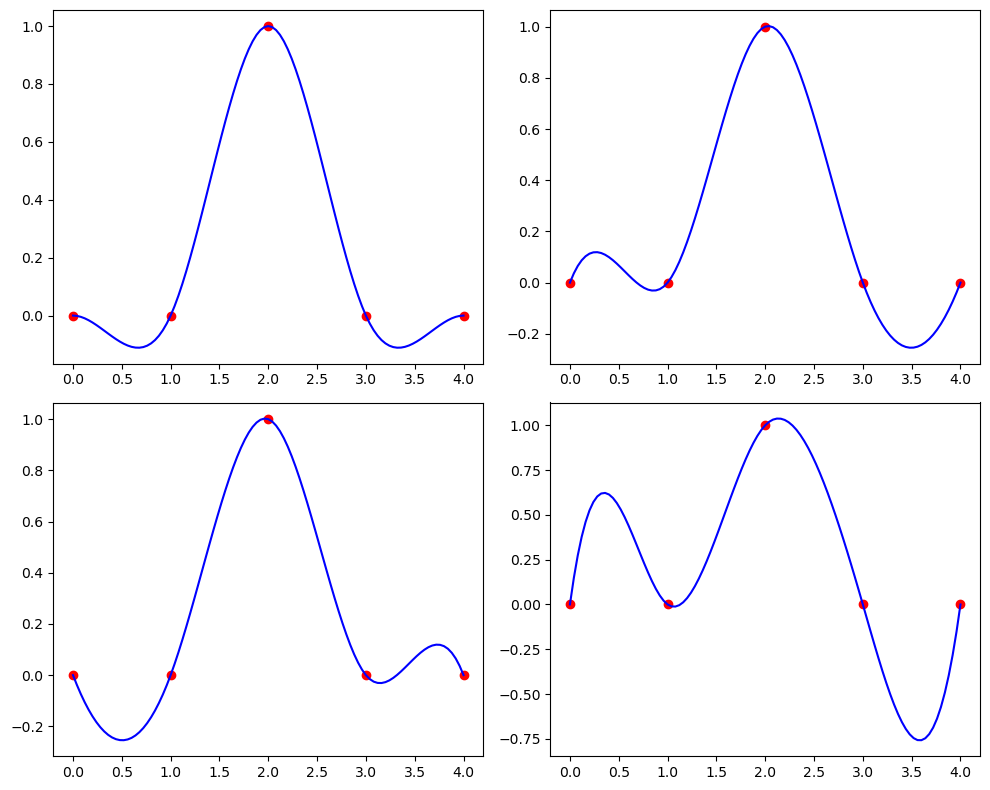

In [19]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)
Y = my_D_cubic_spline(x, y, 1.5, 1)

plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()

9. Write a function `my_lagrange(x, y, X)` where the output Y is the **Lagrange interpolation** of the data points contained in x and y computed at X.                                                                                                        
Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from SciPy.

In [20]:
def my_lagrange(x, y, X):
    n = len(x)
    Y=0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (X - x[j])/(x[i] - x[j])
        Y = Y + p * y[i]
    return Y 

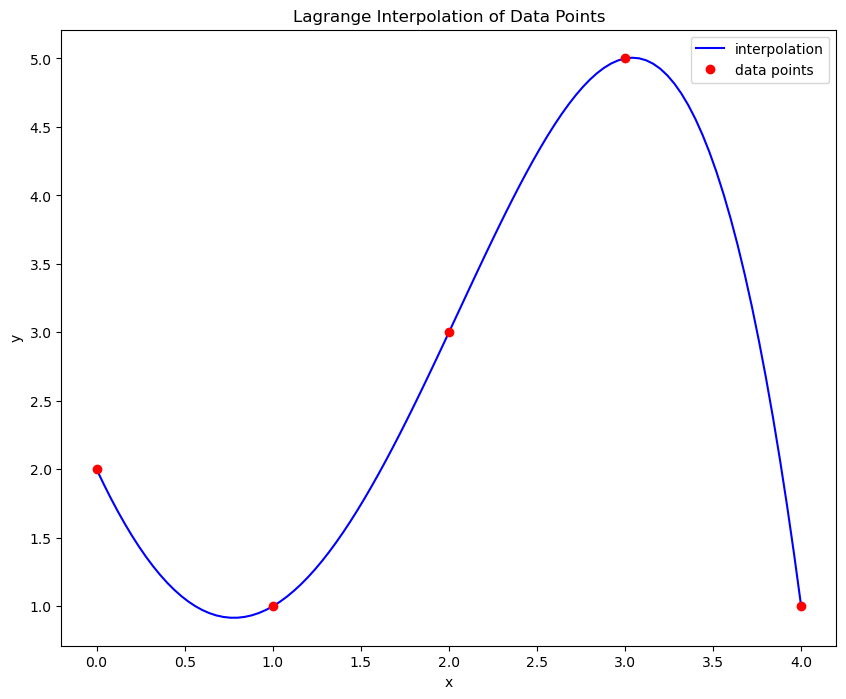

In [21]:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]
X = np.linspace(0, 4, 101)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), "b", label = "interpolation")
plt.plot(x, y, "ro", label = "data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Lagrange Interpolation of Data Points")
plt.legend()
plt.show()

10. Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using **Newton’s polynomial interpolation.**

In [22]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

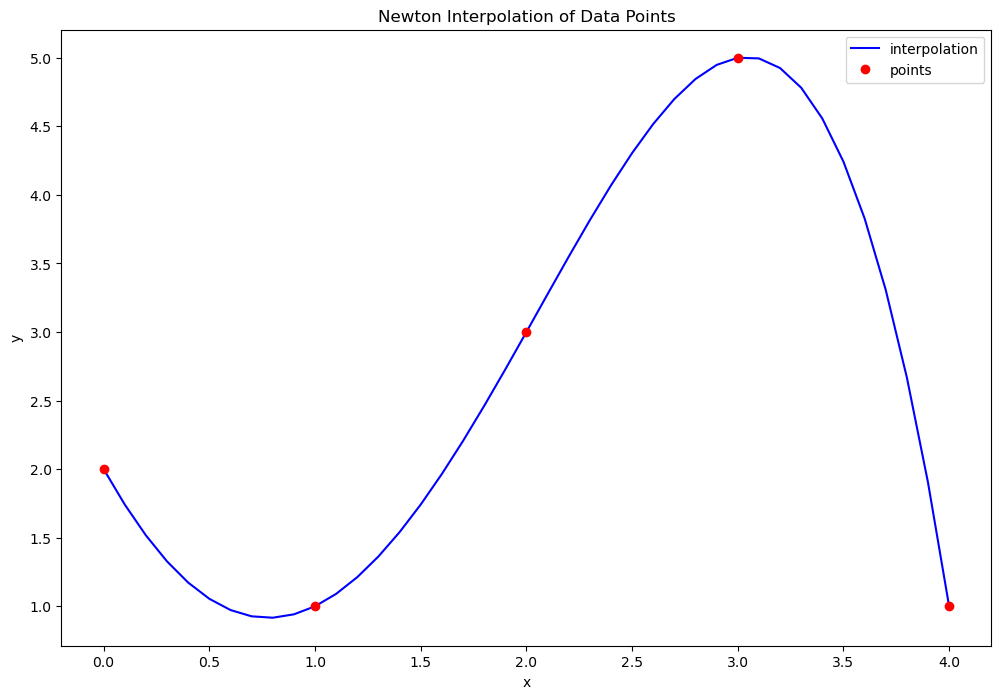

In [23]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(0, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new,'b',x, y, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Newton Interpolation of Data Points")
plt.legend(['interpolation','points'])
plt.show()